In [36]:
print("KUPPIREDDY BHAGEERATHA REDDY")
print("22BCE20355")

KUPPIREDDY BHAGEERATHA REDDY
22BCE20355


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize


In [25]:
# Load dataset (adjust path as needed)
data = pd.read_csv("winequality-red.csv", delimiter=";")
X = data.drop(['quality'], axis=1)
y = data['quality']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Binarize labels for the test set
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]  # Number of classes


In [28]:
classifier = MLPClassifier(hidden_layer_sizes=(22,), activation='relu', random_state=42, max_iter=500, alpha=0.0001)


In [29]:
classifier.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(22,), max_iter=500, random_state=42)

In [30]:
pred = classifier.predict(X_test)
y_score = classifier.predict_proba(X_test)  # Probability estimates for ROC curve


In [31]:
print("Model Accuracy:", classifier.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred, zero_division=1))


Model Accuracy: 0.553125
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0 10  0  0  0]
 [ 0  0 87 41  2  0]
 [ 0  0 44 79  9  0]
 [ 0  0  2 29 11  0]
 [ 0  0  0  3  2  0]]
Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.60      0.67      0.64       130
           6       0.52      0.60      0.56       132
           7       0.46      0.26      0.33        42
           8       1.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.76      0.25      0.25       320
weighted avg       0.57      0.55      0.53       320



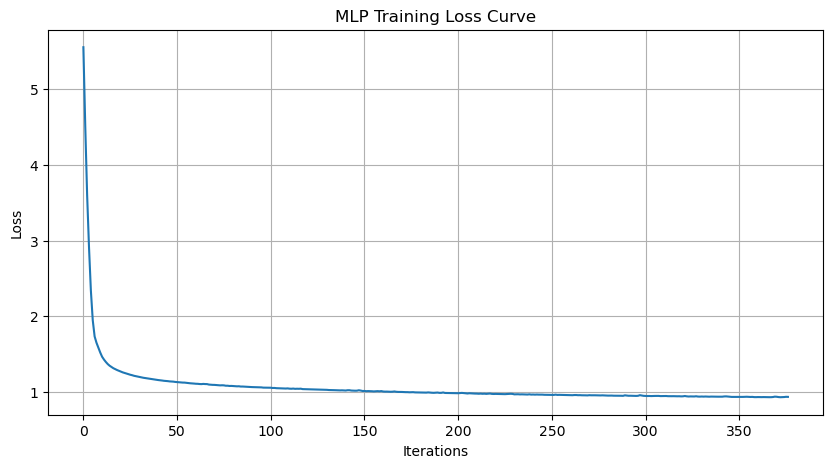

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(classifier.loss_curve_)
plt.title("MLP Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


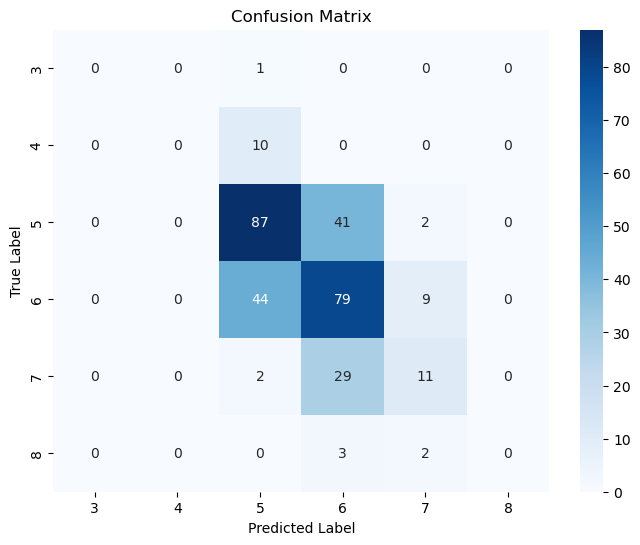

In [33]:
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    classifier, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="green")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.show()
